In [1]:
# Imports
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
# Define o caminho da imagem
face = '../testimages/img_2.png'

In [81]:
# Inicializa imagem
image = Image.open(face)
image_array = np.asarray(image)

# Variaveis da primeira etapa
I = image_array[:,:,:3]
p = I
radius = 4
eps = .1
factor = 1

#Execução do processo
q = cv2.ximgproc.guidedFilter(I, p, radius, eps)
Ie = q + factor*(I-q)
L0 = cv2.ximgproc.l0Smooth(Ie)

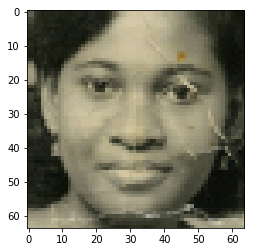

In [82]:
plt.imshow(Ie)

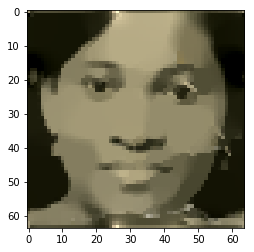

In [83]:
plt.imshow(L0)

In [84]:
#Acha o maior valor médio entre os pixels
A = np.amax(np.average(L0, axis=2))

In [85]:
#Cria a mascara zerada
mask_shape = (L0.shape)
M1 = np.zeros(mask_shape[0:2])

In [86]:
coef = 80
for i,lines in enumerate(M1):
    for j, pixels in enumerate(lines):
        if((A - np.average(L0, axis=2))[i][j] < coef):
            M1[i][j] = 255

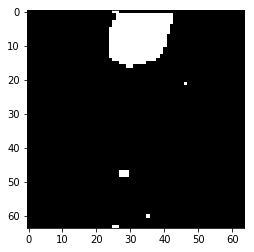

In [87]:
plt.imshow(M1, cmap = 'gray')